In [76]:
import tensorflow as tf
import numpy as np

In [77]:
print(tf.__version__)

2.15.0


In [78]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [79]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Reshape, Activation
from keras.models import Sequential
from keras.optimizers import Optimizer
from keras.optimizers import RMSprop 

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
!unzip mnist.npz

In [7]:
!ls

mnist.ipynb  mnist.npz	x_test.npy  x_train.npy  y_test.npy  y_train.npy


In [81]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [82]:
x_test.shape

(10000, 28, 28)

In [83]:
y_test.shape

(10000,)

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
y_train.shape

(60000,)

In [86]:
import cv2
import matplotlib.pyplot as plt

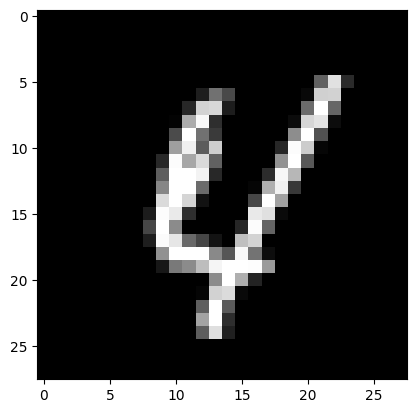

In [87]:
plt.imshow(x_train[700], cmap='gray')

In [88]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [89]:
x_test, x_train = x_test / 255.0, x_train / 255.0

In [90]:
x_train.shape[0]

60000

In [91]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 28 * 28))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 28 * 28))
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

In [92]:
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10) 

In [93]:
x_train_reshaped.shape

(60000, 784)

In [94]:
x_test_reshaped.shape

(10000, 784)

In [109]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation = 'softmax'))

In [110]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 64)                50240     
                                                                 
 dense_75 (Dense)            (None, 128)               8320      
                                                                 
 dense_76 (Dense)            (None, 256)               33024     
                                                                 
 dropout_65 (Dropout)        (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 512)               131584    
                                                                 
 dense_78 (Dense)            (None, 10)                5130      
                                                                 
Total params: 228298 (891.79 KB)
Trainable params: 22

In [115]:
model.compile(
    loss= 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [116]:
model.fit(
    x_train_reshaped,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
750/750 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9830 - val_loss: 0.1173 - val_accuracy: 0.9732
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.1137 - val_accuracy: 0.9741
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.1216 - val_accuracy: 0.9685
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.1025 - val_accuracy: 0.9749
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.1196 - val_accuracy: 0.9708
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.1292 - val_accuracy: 0.9693
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.1188 - val_accuracy: 0.9719
Epoch 

In [117]:
model.evaluate(x_test_reshaped, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9782


[0.09657353162765503, 0.9782000184059143]